#### Simulations with positive autocorrlations

In [1]:
from utills.geodata import generate_grid_dataframes

In [1]:
# import libraries
from geodata import generate_grid_dataframes

from adjacency_simplex import AdjacencySimplex  # Import the class
from plot_utills import plot_simplicial_complex_gif
from calculate_tda_summaries import compute_persistence

In [2]:
# generate grid dataframes for counties and census tracts
county_df, census_df = generate_grid_dataframes(grid_side_length=7,county_autocorrelation="positive", census_autocorrelation="positive" , random_seed=42)

In [3]:
county_df.head(3)

,Index_county,Rate_cou,geometry
0,0,16.056498,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))"
1,1,16.371808,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))"
2,2,16.780932,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))"


In [4]:
county_df['Rate_cou'].describe()

count    49.000000
mean     12.088575
std       3.667584
min       5.768420
25%       9.026877
50%      12.638648
75%      14.696894
max      19.292526
Name: Rate_cou, dtype: float64

In [5]:
census_df.head(3)

,Index_census,Rate_cen,geometry,Index_county
0,0,1.206718,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",0
1,1,1.184803,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))",0
2,2,1.313498,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))",0


In [6]:
for row in county_df.iterrows():

    country_index = row[1]['Index_county']

    # get the census tracts that belong to the county
    census_temp_df = census_df[census_df['Index_county'] == country_index]

    number_of_census_tracts = len(census_temp_df)

    for filter_meth in  ['up', 'down']:

        # Initialize the AdjacencySimplex class
        adj_simplex = AdjacencySimplex(census_temp_df, 'Rate_cen', threshold = None, filter_method = filter_meth)

        # Filter the GeoDataFrame
        filtered_df,gdf_id = adj_simplex.filter_sort_gdf()

        # Calculate the adjacent countries
        adj_simplex.calculate_adjacent_countries()

        # Form the simplicial complex
        simplex = adj_simplex.form_simplicial_complex()

        total_h0_points, tl, al, tml, aml = compute_persistence(simplex,filtered_df, 'Rate_cen')

        if filter_meth == 'up':
            county_df.loc[country_index, 'up_AL'] = al
            county_df.loc[country_index, 'up_AML'] = aml

            county_df.loc[country_index, 'up_TL'] = tl
            county_df.loc[country_index, 'up_TML'] = tml
        elif filter_meth == 'down':
            county_df.loc[country_index, 'down_AL'] = al
            county_df.loc[country_index, 'down_AML'] = aml

            county_df.loc[country_index, 'down_TL'] = tl
            county_df.loc[country_index, 'down_TML'] = tml
            
    county_df.loc[country_index, 'cencus_count'] = number_of_census_tracts


In [13]:
county_df.head(40)

,Index_county,Rate_cou,geometry,up_AL,up_AML,up_TL,up_TML,down_AL,down_AML,down_TL,down_TML,cencus_count
0,0,16.056498,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",3.430188,1.715094,30.871695,15.435847,2.962275,1.481138,26.660478,13.330239,9.0
1,1,16.371808,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))",1.307816,0.653908,32.695398,16.347699,0.986730,0.493365,24.668243,12.334121,25.0
2,2,16.780932,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))",1.319656,0.659828,32.991388,16.495694,1.085891,0.542945,27.147264,13.573632,25.0
3,3,16.473685,"POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))",3.493451,1.746726,31.441059,15.720530,2.695667,1.347834,24.261006,12.130503,9.0
4,4,15.552689,"POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))",0.648299,0.324149,31.766640,15.883320,0.524249,0.262124,25.688193,12.844097,49.0
5,5,15.318131,"POLYGON ((5 0, 6 0, 6 1, 5 1, 5 0))",0.643320,0.321660,31.522684,15.761342,0.519732,0.259866,25.466880,12.733440,49.0
6,6,15.848509,"POLYGON ((6 0, 7 0, 7 1, 6 1, 6 0))",3.451175,1.725587,31.060573,15.530286,3.003102,1.501551,27.027915,13.513958,9.0
7,7,13.281636,"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))",3.164375,1.582188,28.479376,14.239688,2.673131,1.336565,24.058175,12.029087,9.0
8,8,13.639214,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))",0.606209,0.303105,29.704248,14.852124,0.488857,0.244428,23.953974,11.976987,49.0
9,9,14.139013,"POLYGON ((2 1, 3 1, 3 2, 2 2, 2 1))",0.619908,0.309954,30.375516,15.187758,0.491726,0.245863,24.094556,12.047278,49.0


In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [9]:
county_df = gpd.GeoDataFrame(county_df, geometry='geometry')

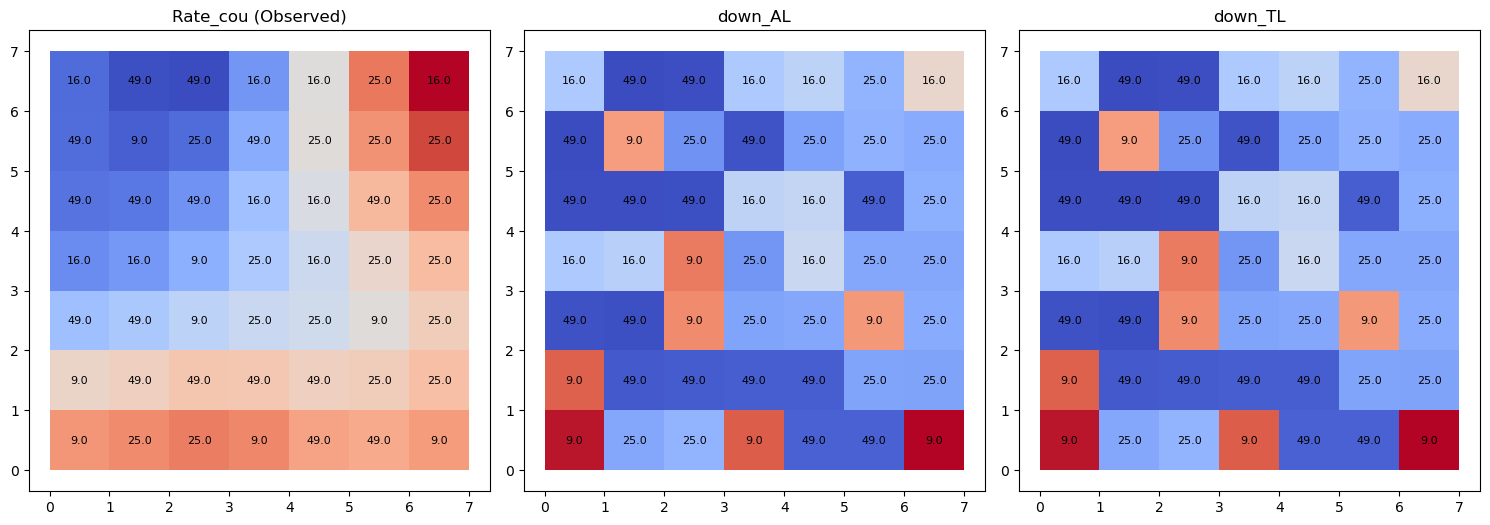

In [10]:
import matplotlib.pyplot as plt

# Create figure with 1 row and 3 columns for maps
fig, axs = plt.subplots(1, 3, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 1, 1]})

# --- First Map: Rate_cou ---
county_df.plot(column='Rate_cou', cmap='coolwarm', legend=False, ax=axs[0])
for idx, row in county_df.iterrows():
    # Calculate the centroid of the county geometry
    centroid = row.geometry.centroid
    # Annotate the plot with the census tract count (as text)
    axs[0].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[0].set_title("Rate_cou (Observed)")

# --- Second Map: down_AL ---
county_df.plot(column='down_AL', cmap='coolwarm', legend=False, ax=axs[1])
for idx, row in county_df.iterrows():
    centroid = row.geometry.centroid
    axs[1].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[1].set_title("down_AL")

# --- Third Map: down_AML ---
county_df.plot(column='down_AML', cmap='coolwarm', legend=False, ax=axs[2])
for idx, row in county_df.iterrows():
    centroid = row.geometry.centroid
    axs[2].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[2].set_title("down_TL")

# Adjust layout for better spacing and display the plot
plt.tight_layout()
plt.show()


Bayesian computation

In [45]:
import pymc as pm
import arviz as az
import numpy as np

In [42]:
# get county rate to a numpy array
Y = county_df['Rate_cou'].to_numpy()

In [ ]:
Y

In [46]:
vN_tda = county_df['cencus_count'].to_numpy()

In [ ]:
n_regions = len(Y)


# Expected number of cases per region (constant for simplicity)
E = np.full(n_regions, 30)

# Define the model

# Define the model
with pm.Model() as poisson_model_N:
    # Prior for random effect (Normal)
    # vN_prior = pm.Normal("vN", mu=0.5, sigma=0.125, shape=n_regions)

    # Assuming you also have a spatial effect uN_prior (add it if it's missing)
    uN_prior = pm.Normal("uN", mu=0, sigma=1, shape=n_regions)  # Adjust parameters as needed

    # Define risk parameter
    thetaN = pm.Deterministic("thetaN", pm.math.exp(pm.math.log(E) + uN_prior + vN_tda))

    Y_obs_N = pm.Poisson("Y_obs_N", mu=thetaN, observed=Y)

    # Sample the model

    trace_N = pm.sample(2000, tune=1000, target_accept=0.95, random_seed=42)


In [62]:
thetaN_samples = trace_N.posterior["thetaN"]  # 
uN_samples = trace_N.posterior["uN"]  #

theraN_array = np.array(trace_N.posterior["thetaN"])  # Shape: (chains, samples, n_regions)
un_array = np.array(trace_N.posterior["uN"])  # Shape: (chains, samples, n_regions)

thetaN_mean = theraN_array.mean(axis=(0, 1))  # Average over chains & samples
uN_mean = un_array.mean(axis=(0, 1))  # Average over chains

# add the mean of the theta to the county_df
county_df['thetaN_mean'] = thetaN_mean
county_df['uN_mean'] = uN_mean

In [ ]:
import matplotlib.pyplot as plt

# Create figure with 1 row and 3 columns for maps
fig, axs = plt.subplots(1, 3, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 1, 1]})

# --- First Map: Rate_cou ---
county_df.plot(column='Rate_cou', cmap='coolwarm', legend=False, ax=axs[0])
for idx, row in county_df.iterrows():
    # Calculate the centroid of the county geometry
    centroid = row.geometry.centroid
    # Annotate the plot with the census tract count (as text)
    axs[0].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[0].set_title("Rate_cou (Observed)")

# --- Second Map: down_AL ---
county_df.plot(column='thetaN_mean', cmap='coolwarm', legend=False, ax=axs[1])
for idx, row in county_df.iterrows():
    centroid = row.geometry.centroid
    axs[1].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[1].set_title("thetaN_mean")

# --- Third Map: down_AML ---
county_df.plot(column='uN_mean', cmap='coolwarm', legend=False, ax=axs[2])
for idx, row in county_df.iterrows():
    centroid = row.geometry.centroid
    axs[2].annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
axs[2].set_title("uN_mean")

# Adjust layout for better spacing and display the plot
plt.tight_layout()
plt.show()